In [1]:
import warnings
warnings.filterwarnings('ignore')
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

transform = transforms.Compose(
                    [transforms.ToTensor(),
                     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 4

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)

trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

classes = ('aeronave', 'carro', 'passaro', 'gato',
           'veado', 'cachorro', 'sapo', 'cavalo', 'navio', 'caminhao')

Files already downloaded and verified
Files already downloaded and verified


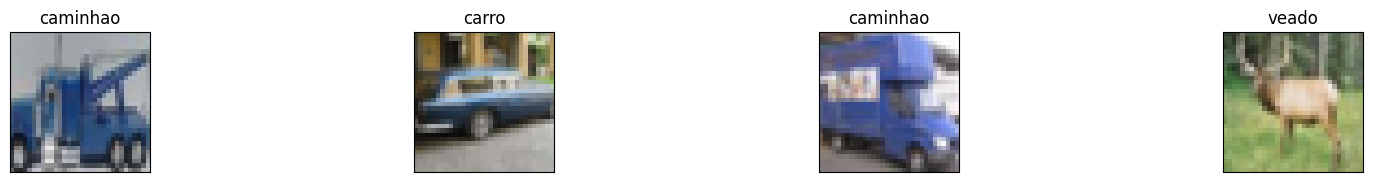

In [2]:
import numpy as np
def imshow(img):
    img = (img * 0.5) + 0.5
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))

dataiter = iter(trainloader)
images, labels = next(dataiter)


fig = plt.figure(figsize=(20, 4))
for idx in np.arange(4):
    ax = fig.add_subplot(2, 4, idx+1, xticks=[], yticks=[])
    imshow(images[idx])
    ax.set_title(classes[labels[idx]])

plt.show()

In [3]:
import torch.nn as nn
import torch.nn.functional as F

class CNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)        # classe convolucional bidimensional, 3 canais de entrada (RGB), 6 camamdas(numeor de filtros convolucionais) , e 5 de kernel
        self.pool = nn.MaxPool2d(2, 2)   #Maxpool (pooling= redução dimensional) janela 2x2, stride de 2=> redução pela metade (valor maximo em cada janela)
        self.conv2 = nn.Conv2d(6, 16, 5) #outra camada convolucional que tem 6 de entrada, 16 camadas, filtro de 5x5
        self.fc1 = nn.Linear(16 * 5 * 5, 120) #camada linear (totalmente conectada), mapeia osneuronios de entrada para os de saída, 120 neuronios intermediarios
        self.fc2 = nn.Linear(120, 84)  # outra cmaamda linear que conecta 120 neuronios da camada anterior a 84 nessa intermemdiaria
        self.fc3 = nn.Linear(84, 10) # 84 da anterior para 10 saidas CIFAR-10

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x))) #pooling com relu função de ativasção aa cada convolução, passando pelas camadas, para reduzir a dimnesão espacial das saídas convolucionais
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1) # dimensionar
        x = F.relu(self.fc1(x)) # o vetor achatado passa pela primeira camada linear e aplica a relu
        x = F.relu(self.fc2(x)) #
        x = self.fc3(x) #passa pela final se funçãod e ativação pois é a final ne
        return x


cnn = CNN()

# Loss function e otimizador

In [4]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss() #cross entropy p perda
optimizer = optim.SGD(cnn.parameters(), lr=0.001, momentum=0.9)#grqadiente descendent estocastico para estimativa, taxa de aprendizado, momentum suaviza as atualizações de peso

# treinando

In [5]:
epochs = 4 # vezews
for epoch in range(epochs):
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0): #percorrendo os batches de dados
        inputs, labels = data# um batch é carregado em trainloader e armazenado em data ISSO PARA CADA BATCHHH !!

        optimizer.zero_grad() # gradientes zerados a iteraçãp para nao se acumular em backward

        outputs = cnn(inputs)
        loss = criterion(outputs, labels) #calcula a perda por crossentropy
        loss.backward()
        optimizer.step() #att os epsos

        running_loss += loss.item()
        if i % 2000 == 1999:
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')


[1,  2000] loss: 2.208
[1,  4000] loss: 1.826
[1,  6000] loss: 1.621
[1,  8000] loss: 1.558
[1, 10000] loss: 1.499
[1, 12000] loss: 1.467
[2,  2000] loss: 1.401
[2,  4000] loss: 1.354
[2,  6000] loss: 1.345
[2,  8000] loss: 1.354
[2, 10000] loss: 1.307
[2, 12000] loss: 1.279
[3,  2000] loss: 1.209
[3,  4000] loss: 1.223
[3,  6000] loss: 1.209
[3,  8000] loss: 1.199
[3, 10000] loss: 1.181
[3, 12000] loss: 1.167
[4,  2000] loss: 1.085
[4,  4000] loss: 1.115
[4,  6000] loss: 1.094
[4,  8000] loss: 1.113
[4, 10000] loss: 1.118
[4, 12000] loss: 1.106
Finished Training


In [6]:
import os
model_path = './model/'
file_name = 'cnn_model.pth'

if not os.path.exists(model_path):
        os.makedirs(model_path)

torch.save(cnn.state_dict(), model_path + file_name)

# teste

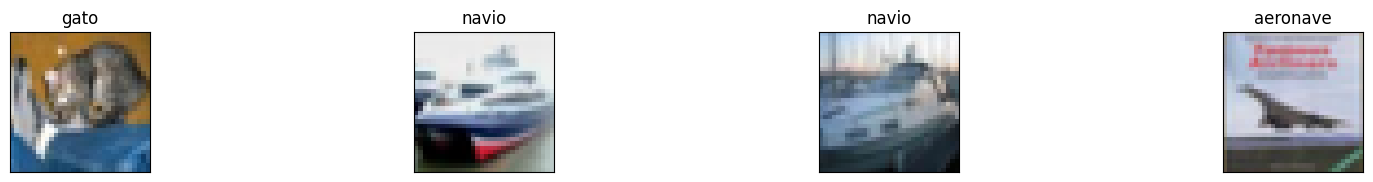

In [7]:
dataiter = iter(testloader) #usando o teste e nao o treino
images, labels = next(dataiter)

fig = plt.figure(figsize=(20, 4))
for idx in np.arange(4):
    ax = fig.add_subplot(2, 4, idx+1, xticks=[], yticks=[])
    imshow(images[idx])
    ax.set_title(classes[labels[idx]])

plt.show()

In [8]:
cnn = CNN()
cnn.load_state_dict(torch.load(model_path + file_name))

<All keys matched successfully>

In [9]:
outputs = cnn(images)
outputs

_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))# num gostei pq ficou errado ms é normal

Predicted:   gato navio caminhao aeronave


In [10]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data #armazena os batchs
        outputs = cnn(images)
        _, predicted = torch.max(outputs.data, 1) # torchmax para obter o indice de classe com a maior prob
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 60 %


# analisando a performance

In [11]:
correct_pred = {classname: 0 for classname in classes}
total_pred = {classname: 0 for classname in classes}

with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = cnn(images)
        _, predictions = torch.max(outputs, 1)

        for label, prediction in zip(labels, predictions):
            if label == prediction:
                correct_pred[classes[label]] += 1
            total_pred[classes[label]] += 1

for classname, correct_count in correct_pred.items():
    accuracy = 100 * float(correct_count) / total_pred[classname]
    print("Accuracy for class {:5s} is: {:.1f} %".format(classname,
                                                   accuracy))

Accuracy for class aeronave is: 58.3 %
Accuracy for class carro is: 63.0 %
Accuracy for class passaro is: 52.4 %
Accuracy for class gato  is: 35.5 %
Accuracy for class veado is: 54.3 %
Accuracy for class cachorro is: 54.6 %
Accuracy for class sapo  is: 61.7 %
Accuracy for class cavalo is: 74.0 %
Accuracy for class navio is: 70.4 %
Accuracy for class caminhao is: 79.7 %
